# Kmeans Clustering definition

## importing libraries and dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import euclidean_distances
from sklearn.metrics.cluster import contingency_matrix
data = load_iris(return_X_y=True)
X = data[0]
y = data[1]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Initializing centers

In [2]:
n_clusters = 3

randomIndices = np.random.randint(len(y), size = (n_clusters))
print('RandomIndices: ', randomIndices)
init_centers = X[randomIndices]
print('Initial Centers: ', init_centers)


RandomIndices:  [10 14 12]
Initial Centers:  [[5.4 3.7 1.5 0.2]
 [5.8 4.  1.2 0.2]
 [4.8 3.  1.4 0.1]]


## Iterating over array to calculate Kmeans centers

In [3]:
max_iter = 30
tol = 0.0001

labels_ = np.full(y.shape, -1)
itr = 0
centers = init_centers
while itr < max_iter:
    print(centers)
    itr += 1

    for i in range(len(y)):
        labels_[i] = np.argmin(euclidean_distances([X[i]], centers)[0])

    next_centers = np.array([np.mean(X[labels_ == l], axis=0) for l in np.unique(labels_)])

    if(np.mean(np.abs(next_centers - centers)) < tol):
        break

    centers = next_centers

[[5.4 3.7 1.5 0.2]
 [5.8 4.  1.2 0.2]
 [4.8 3.  1.4 0.1]]
[[6.12521739 3.06434783 4.29565217 1.42521739]
 [5.66666667 4.2        1.36666667 0.26666667]
 [4.846875   2.925      2.05       0.475     ]]
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.25454545 3.75       1.45454545 0.26363636]
 [4.82903226 3.1        1.63548387 0.30967742]]
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.24230769 3.7        1.46923077 0.26923077]
 [4.77777778 3.05185185 1.64814815 0.31111111]]
[[6.31458333 2.89583333 4.97395833 1.703125  ]
 [5.23333333 3.68888889 1.47037037 0.26666667]
 [4.77777778 3.         1.72222222 0.34074074]]
[[6.31458333 2.89583333 4.97395833 1.703125  ]
 [5.21       3.65       1.46333333 0.26666667]
 [4.75       2.9625     1.7625     0.35      ]]
[[6.31458333 2.89583333 4.97395833 1.703125  ]
 [5.20645161 3.63870968 1.47096774 0.27419355]
 [4.73478261 2.94782609 1.76521739 0.34347826]]
[[6.31458333 2.89583333 4.97395833 1.703125  ]
 [5.19375    3.63125    1.475      0.271875

In [4]:
labels_

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Calculating accuracy

In [5]:
c = contingency_matrix(labels_, y)
print(c)

[[ 0 46 50]
 [32  0  0]
 [18  4  0]]


In [6]:
np.sum(c.ravel()[np.argpartition(c.ravel(), -n_clusters)[-n_clusters:]]) / len(y)

0.8533333333333334

# Regression for bivariate data

## importing libraries and defining dataset

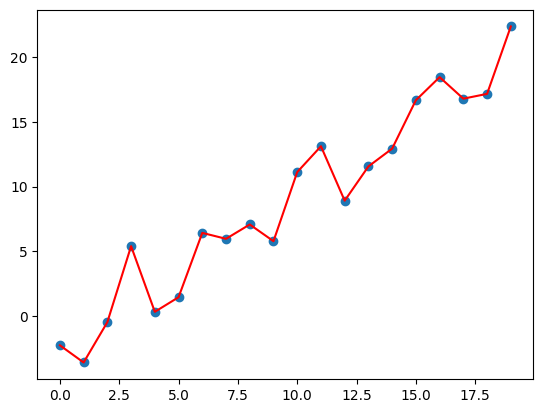

In [7]:
import matplotlib.pyplot as plt
import numpy as np
X, y = np.arange(20), (np.arange(20) + 10*(np.random.rand(20)- 0.5))
r = np.random.rand(20)
plt.scatter(X, y)
plt.plot(X, y, color='red')
plt.show()

## learning using bivariate data

In [8]:
def objective(X, a, b):
    return a * X*2 + b

In [9]:
from scipy.optimize import curve_fit

fit_res = curve_fit(objective, X, y)

print(fit_res[0])

[ 0.60262948 -2.68795139]


In [10]:
a, b = fit_res[0]
print(a, b)

0.6026294802299456 -2.687951390493826


In [11]:
print('y = %.5f * x^2 + %.5f' % (a, b))

y = 0.60263 * x^2 + -2.68795


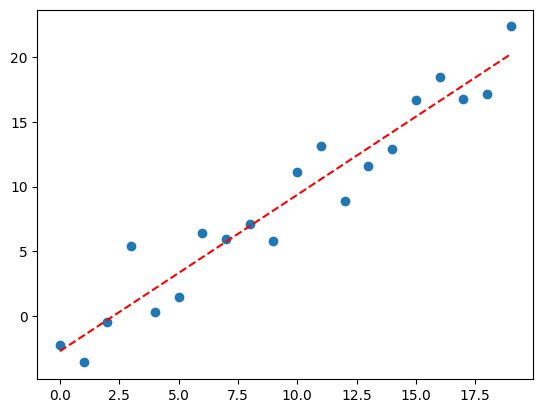

In [12]:
x_line = np.arange(20)
y_line = objective(x_line, a, b)
plt.scatter(X, y)
plt.plot(x_line, y_line,'--', color='red')
plt.show()

## multivariate data

y = 0.00368 * x^2 + 1.13540 * x + -2.47838


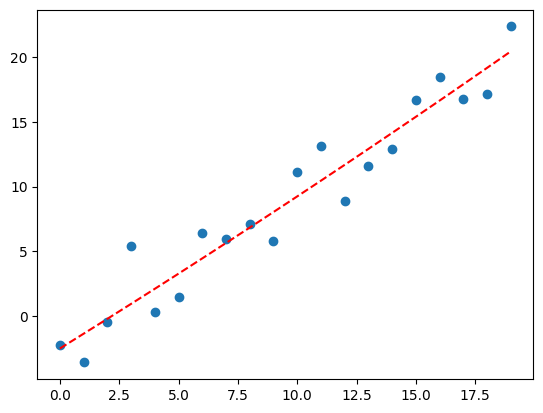

In [13]:
def objective(X, a, b, c):
    return a * X**2 + b * X + c

fit_res = curve_fit(objective, X, y)

a,b,c = fit_res[0]
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))

x_line = np.arange(20)
y_line = objective(x_line, a, b, c)
plt.scatter(X, y)
plt.plot(x_line, y_line,'--', color='red')
plt.show()


y = 0.00003 * x^5 + -0.00152 * x^4 + 0.02578 * x^3 + -0.20257 * x^2 + 1.87053 * x + -3.13843


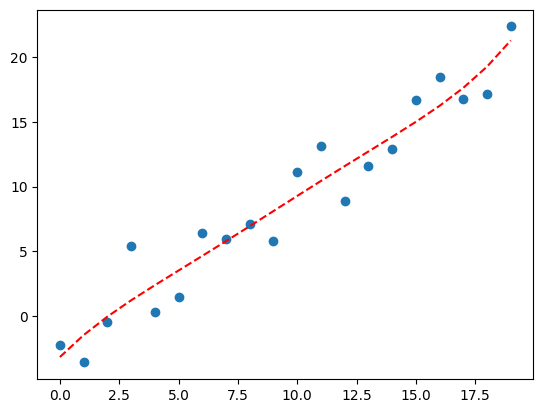

In [14]:
def objective(X, a, b, c, d, e, f):
    return a * X**5 + b * X**4 + c * X**3 + d * X**2 + e * X + f

fit_res = curve_fit(objective, X, y)

a,b,c,d,e,f = fit_res[0]
print('y = %.5f * x^5 + %.5f * x^4 + %.5f * x^3 + %.5f * x^2 + %.5f * x + %.5f' % (a, b, c, d, e, f))

x_line = np.arange(20)
y_line = objective(x_line, a, b, c, d, e, f)
plt.scatter(X, y)
plt.plot(x_line, y_line,'--', color='red')
plt.show()

# DB-SCAN

## Importing libraries and datasets 

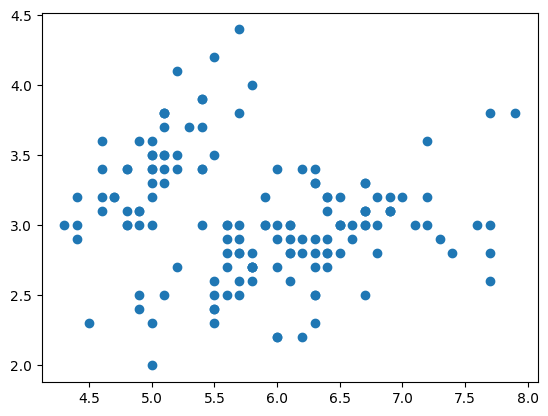

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris(return_X_y=True)
X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1])
plt.show()



## Making our model

In [31]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X, y)

pred = model.fit_predict(X)
print(pred)




[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
